# The Oscars

## Introduction


The project is about building vizualizations. The dataset picked was the soccer matches dataset which contains europe soccer matches and scores for multiple years. The project is about building data visualisation on scores, teams and matches for the soccer datasets. Exploratory data analysis is also performed on the data set to produce interesting results

The data was obatined from the following link:

https://github.com/fivethirtyeight/data/tree/master/soccer-spi

The data are contained in the files spi_global_rankings.csv, spi_global_rankings_intl.csv, spi_matches.csv.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import itertools


### Import the data

In [2]:
data = pd.read_csv("Data/spi_matches.csv")    #use your own path for the data set
data.head(10)

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
5,2016-08-13,2411,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,...,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,1.05,1.05
6,2016-08-13,2411,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,...,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,0.00,1.05
7,2016-08-13,2411,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,...,34.1,30.7,1.0,1.0,1.05,0.22,1.52,0.41,1.05,1.05
8,2016-08-13,1843,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,0.3004,...,37.9,44.2,3.0,2.0,1.03,1.84,1.10,2.26,3.12,2.10
9,2016-08-13,2411,Barclays Premier League,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,0.1323,...,73.0,27.0,2.0,1.0,2.14,1.25,1.81,0.92,2.10,1.05


In [3]:
data.shape

(32251, 22)

* To have more flexibility in our visualizations and since this is a large dataset we will drop the null values

In [4]:
data.dropna(inplace=True)

In [5]:
data.isnull().sum()

date           0
league_id      0
league         0
team1          0
team2          0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

In [6]:
def label5(string):
    return string[0:4]

In [7]:
data['year']=data['date'].apply(label5)

In [8]:
data.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,year
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05,2016
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10,2016
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05,2016
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05,2016
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05,2016


## Exploratory Data Analysis

### Matches by League

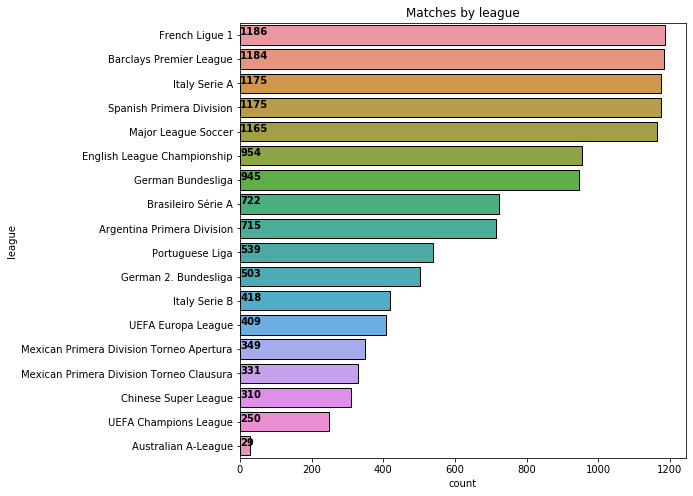

In [9]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique())
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

### Matches Played by Year

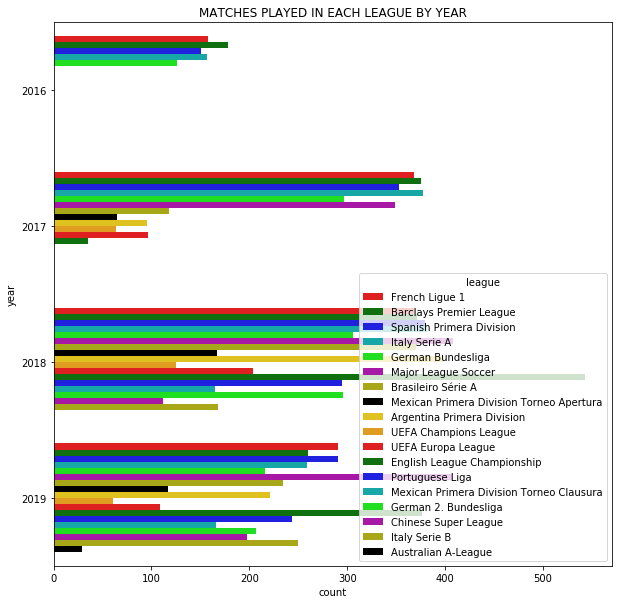

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(y = data["year"],hue=data["league"],
              palette=["r","g","b","c","lime","m","y","k","gold","orange"])
plt.title("MATCHES PLAYED IN EACH LEAGUE BY YEAR")
plt.show()

### Home and away goals by league

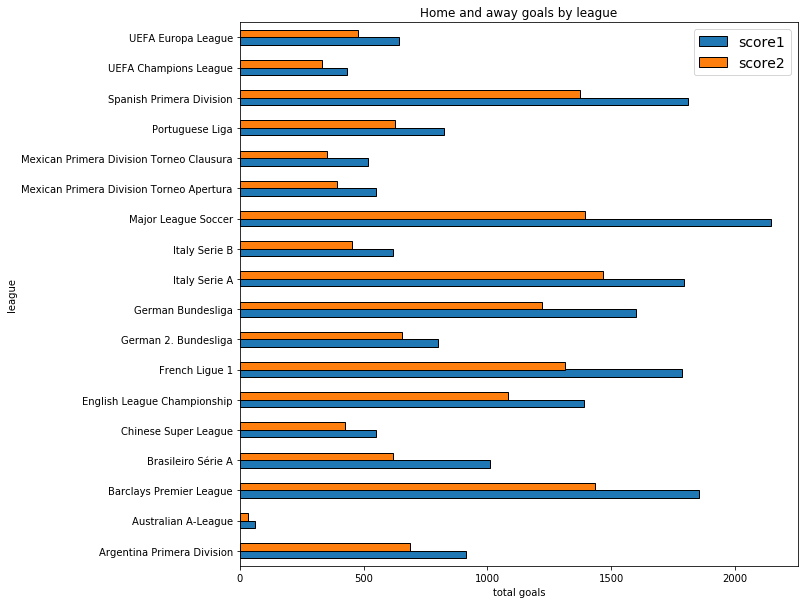

In [11]:
data.groupby("league").agg({"score1":"sum","score2":"sum"}).plot(kind="barh",
                                                            figsize = (10,10),
                                                            edgecolor = "k",linewidth =1 )
plt.title("Home and away goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total goals")
plt.show()

### Top 25 teams by Their home goals

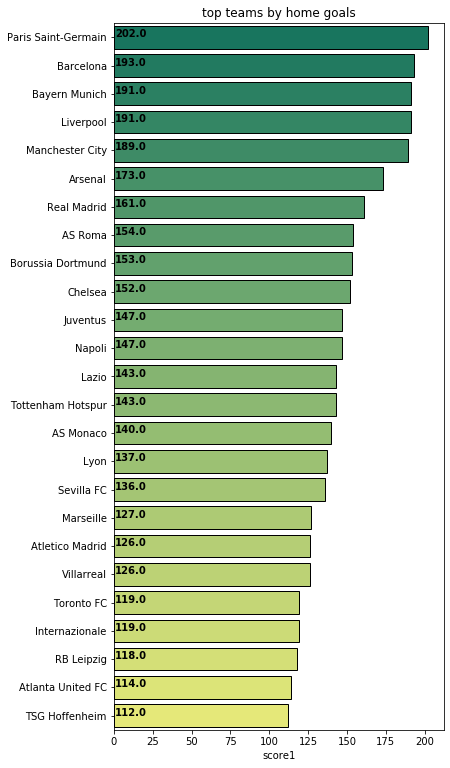

In [12]:

h_t = data.groupby("team1")["score1"].sum().reset_index()
a_t = data.groupby("team2")["score2"].sum().reset_index()
h_t = h_t.sort_values(by="score1",ascending= False)
a_t = a_t.sort_values(by="score2",ascending= False)
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="team1",x="score1",
                 data=h_t[:25],palette="summer",
                 linewidth = 1,edgecolor = "k"*25)
plt.ylabel('')
plt.title("top teams by home goals")
for i,j in enumerate(h_t["score1"][:25]):
    ax.text(.7,i,j,weight = "bold")


### Top 25 teams by Their away goals

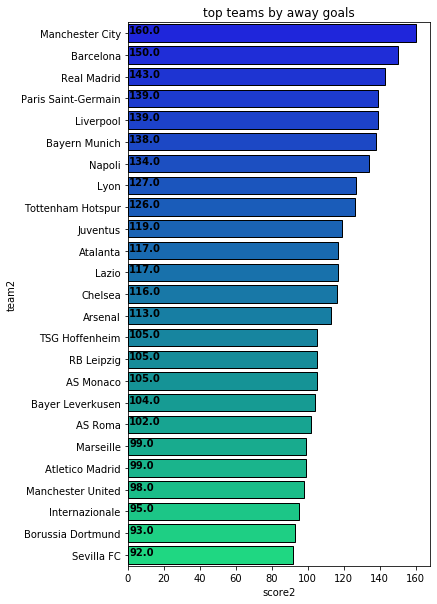

In [13]:
plt.figure(figsize=(13,10))
plt.subplot(122)
ax = sns.barplot(y="team2",x="score2",
                 data=a_t[:25],palette="winter",
                linewidth = 1,edgecolor = "k"*25)
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["score2"][:25]):
    ax.text(.7,i,j,weight = "bold")

### Teams with the most goals

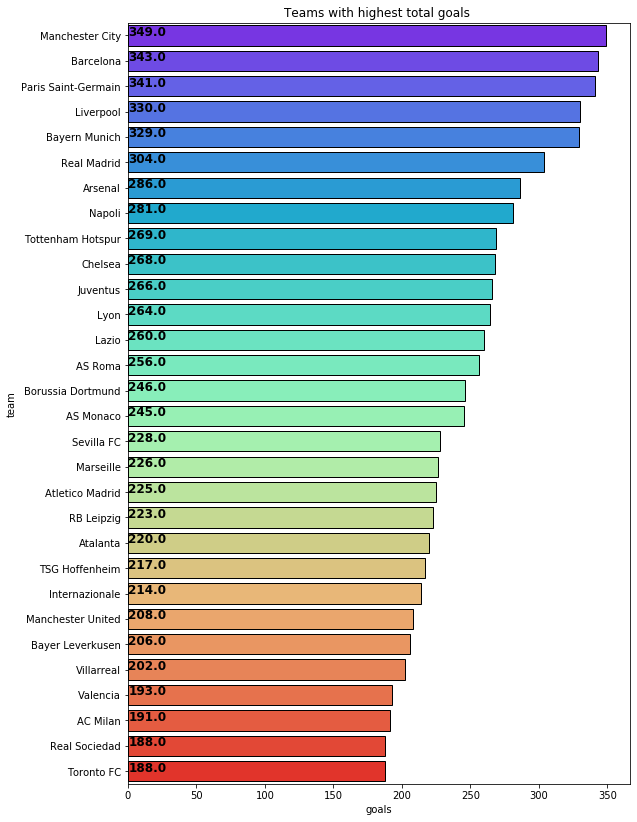

In [14]:
x = h_t
x = x.rename(columns={'team1':"team", 'score1':"goals"})
y = a_t
y = y.rename(columns={'team2':"team", 'score2':"goals"})
goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="rainbow",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Teams with highest total goals ")
plt.show()

### Top 30 teams with most goals in a network layout

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


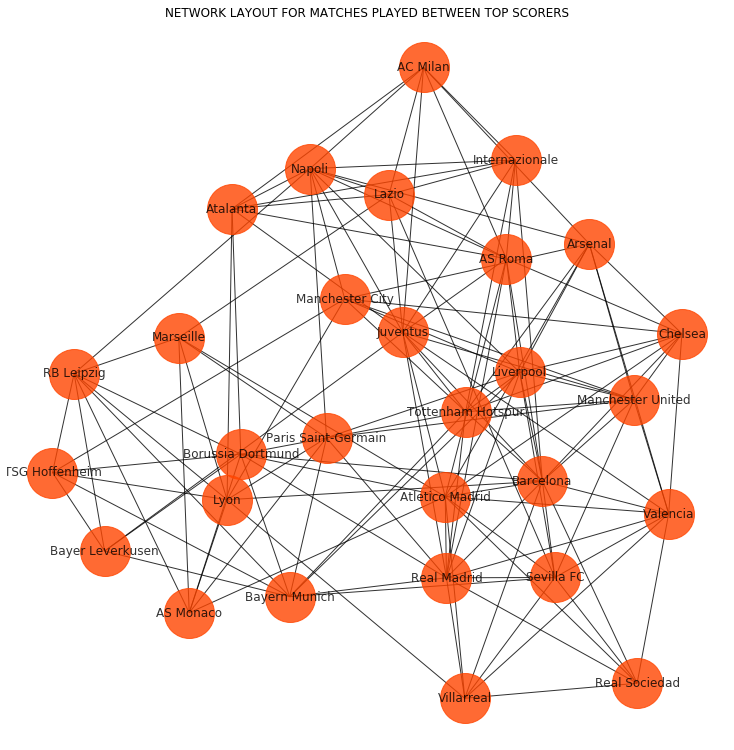

In [15]:
ts = list(goals["team"][:30])
v =data[["team1","team2"]]
v = v[(v["team1"].isin(ts)) & (v["team2"].isin(ts))]
import networkx as nx
g = nx.from_pandas_edgelist(v,"team1","team2")
fig = plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(g,with_labels =True,node_size =2500,node_color ="Orangered",alpha=.8)
plt.title("NETWORK LAYOUT FOR MATCHES PLAYED BETWEEN TOP SCORERS")
fig.set_facecolor("white")

### Matches Played by teams

In [16]:
x = data.groupby("team1")["date"].count().reset_index()
x = x.rename(columns={"team1":"team"})
y = data.groupby("team2")["date"].count().reset_index()
y = y.rename(columns={"team2":"team"})
xy = pd.concat([x,y],axis=0)
match_teams =  xy.groupby("team")["date"].sum().reset_index().sort_values(by="date",ascending =False)
match_teams = match_teams.rename(columns={"date":"matches_played"})
match_teams[:20]

,team,matches_played
26,Arsenal,146
218,Liverpool,145
94,Chelsea,141
34,Atletico Madrid,141
373,Tottenham Hotspur,140
331,Sevilla FC,139
44,Barcelona,139
236,Marseille,138
11,AS Roma,138
210,Lazio,137


### Distribution of home and away goals

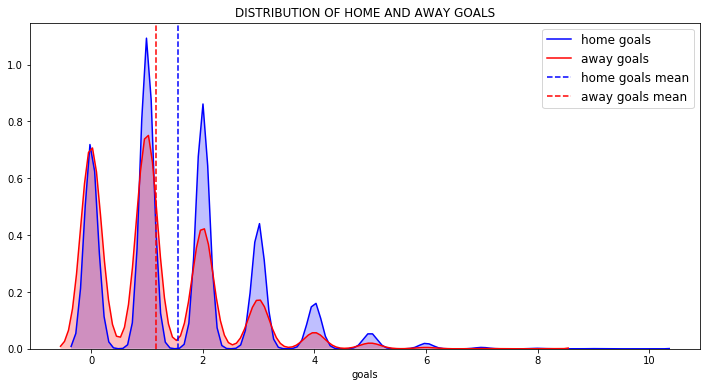

In [17]:
plt.figure(figsize=(12,6))
sns.kdeplot(data["score1"],shade=True,
            color="b",label="home goals")
sns.kdeplot(data["score2"],shade=True,
            color="r",label="away goals")
plt.axvline(data["score1"].mean(),linestyle = "dashed",
            color="b",label="home goals mean")
plt.axvline(data["score2"].mean(),linestyle = "dashed",
            color="r",label="away goals mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("goals")
plt.show()

### Home and Away Goals by year

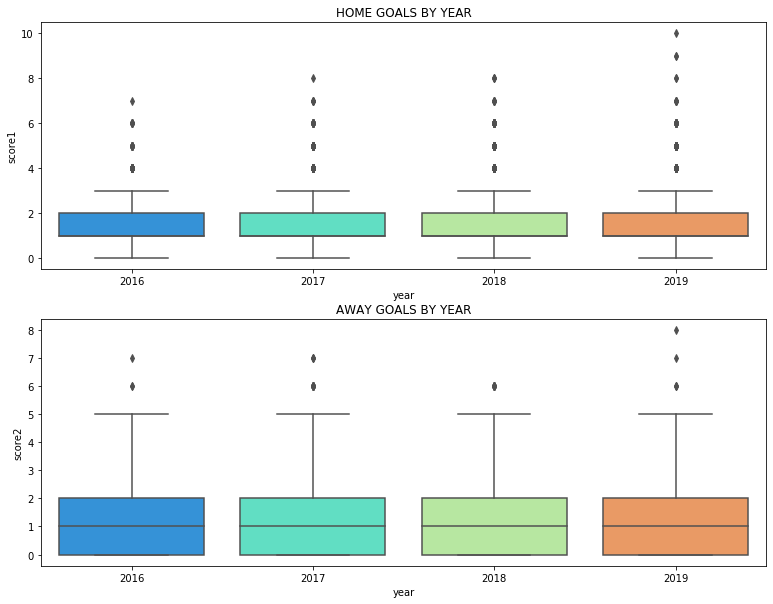

In [18]:
plt.figure(figsize=(13,10))
plt.subplot(211)
sns.boxplot(x = data["year"],y = data["score1"],palette="rainbow")
plt.title("HOME GOALS BY YEAR")
plt.subplot(212)
sns.boxplot(x = data["year"],y = data["score2"],palette="rainbow")
plt.title("AWAY GOALS BY YEAR")
plt.show()

### Summary of total goals scored by year

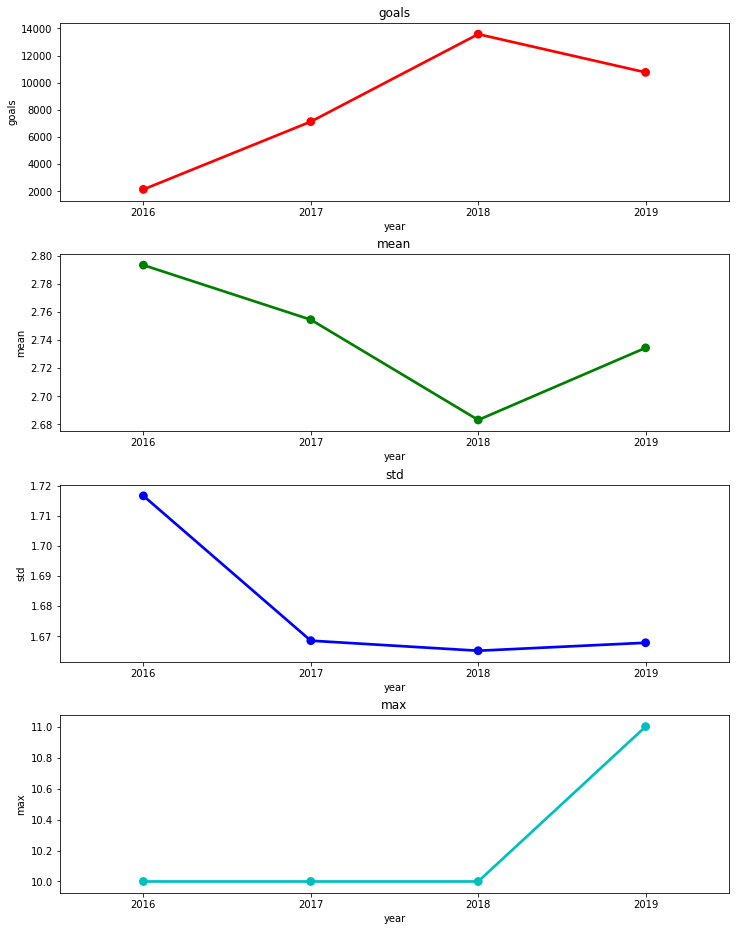

In [19]:
data["total_goal"] = data["score1"]+data["score2"]
a = data.groupby("year").agg({"total_goal":"sum"})
m = data.groupby("year").agg({"total_goal":"mean"})
s = data.groupby("year").agg({"total_goal":"std"})
x = data.groupby("year").agg({"total_goal":"max"})
xx = a.merge(m,left_index=True,right_index=True,how="left")
yy = s.merge(x,left_index=True,right_index=True,how="left")
x_y = xx.merge(yy,left_index=True,right_index=True,how="left").reset_index()
x_y = x_y.rename(columns={'total_goal_x_x':"goals", 'total_goal_y_x':"mean",
                          'total_goal_x_y':"std",'total_goal_y_y':"max"})
import itertools
cols = [ 'goals', 'mean', 'std', 'max' ]
length = len(cols)
cs   = ["r","g","b","c"] 
plt.figure(figsize=(12,16))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(length,length/length,j+1)
    sns.pointplot(x_y["year"],x_y[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace =.3)

### Feature Engineering

* Now we will create three additional features.
* The first feature is called win that specified which of the two teams won the match.
* The second feature is called lost that specifies which of the two teams lost the match.
* The third feature is called outcome side that specifies whether the home or away team won the match.


In [20]:
#create new feature for winning team
def label(data):
    if data["score1"] > data["score2"]:
        return data["team1"]
    elif data["score2"] > data["score1"]:
        return data["team2"]
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [21]:
data["win"] = data.apply(lambda data:label(data),axis=1)

In [22]:
#create new feature for losing team
def label1(data):
    if data["score1"] < data["score2"]:
        return data["team1"]
    elif data["score2"] < data["score1"]:
        return data["team2"]
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [23]:
data["lost"] = data.apply(lambda data:label1(data),axis=1)

In [24]:
#create new feature for outcome of match
def label2(data):
    if data["score1"] > data["score2"]:
        return "HOME TEAM WIN"
    elif data["score2"] > data["score1"]:
        return "AWAY TEAM WIN"
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [25]:
data["outcome_side"] = data.apply(lambda data:label2(data),axis = 1)

In [26]:
data.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,xg2,nsxg1,nsxg2,adj_score1,adj_score2,year,total_goal,win,lost,outcome_side
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,0.63,0.43,0.45,0.00,1.05,2016,1.0,Paris Saint-Germain,Bastia,AWAY TEAM WIN
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,0.77,1.75,0.42,2.10,2.10,2016,4.0,DRAW,DRAW,DRAW
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,2.77,0.17,1.25,2.10,1.05,2016,3.0,Hull City,Leicester City,HOME TEAM WIN
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,0.68,0.84,1.60,0.00,1.05,2016,1.0,West Bromwich Albion,Crystal Palace,AWAY TEAM WIN
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,1.11,0.88,1.81,1.05,1.05,2016,2.0,DRAW,DRAW,DRAW


### Proportion of game outcomes based on home and away teams

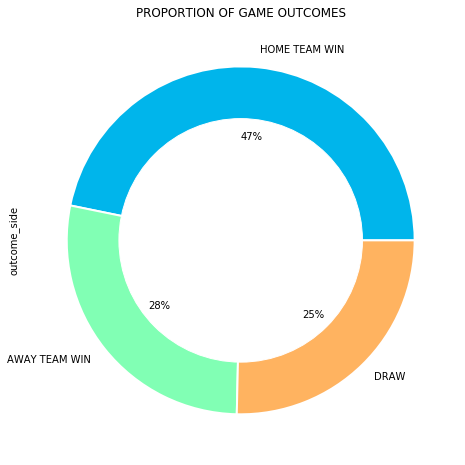

In [27]:
plt.figure(figsize=(8,8))
data["outcome_side"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GAME OUTCOMES")
plt.show()

### Top Winning & Losing Teams

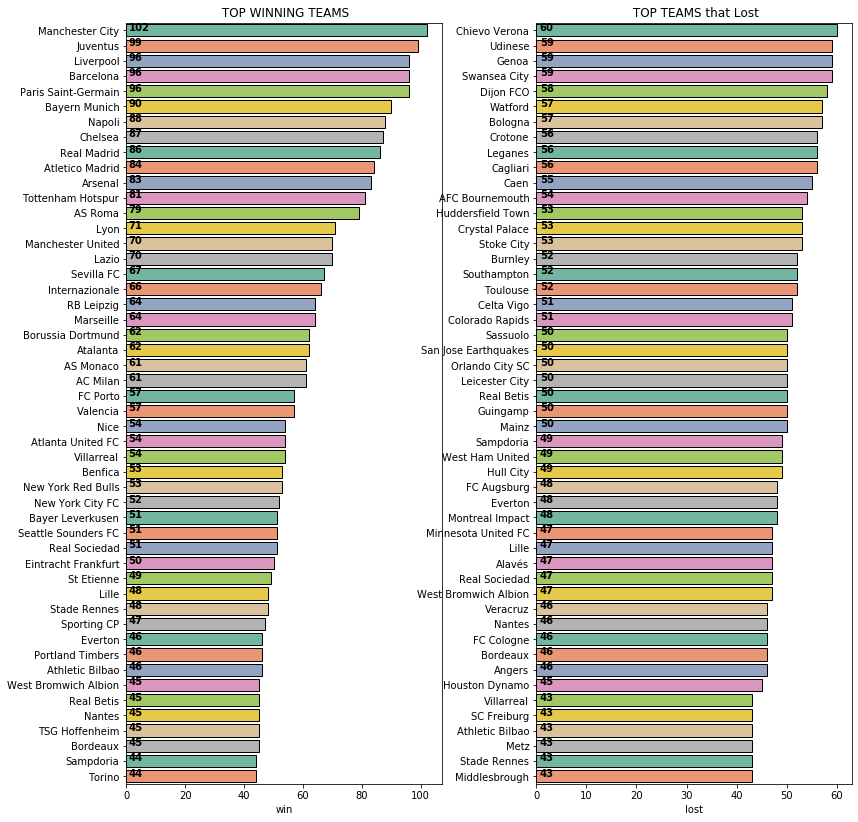

In [28]:
win = data["win"].value_counts()[1:].reset_index()
lost = data["lost"].value_counts()[1:].reset_index()
plt.figure(figsize=(13,14))
plt.subplot(121)
ax = sns.barplot(win["win"][:50],win["index"][:50],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*50)
plt.title(" TOP WINNING TEAMS")
plt.ylabel("")
for i,j in enumerate(win["win"][:50]):
    ax.text(.7,i,j,color = "black",weight = "bold")
    
plt.subplot(122)
ax = sns.barplot(lost["lost"][:50],lost["index"][:50],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*50)
plt.title(" TOP TEAMS that Lost")
plt.subplots_adjust(wspace = .3)
plt.ylabel("")
for i,j in enumerate(lost["lost"][:50]):
    ax.text(.7,i,j,color = "black",weight = "bold")

In [29]:
x = data.groupby(["team1","league"]).agg({"league_id":"count","score1":"sum"}).reset_index()
y = data.groupby(["team2","league"]).agg({"league_id":"count","score2":"sum"}).reset_index()
x = x.rename(columns={'team1':"team", 'league_id':"matches", 'score1':"goals"})
y = y.rename(columns={'tean2':"team", 'league_id':"matches", 'score2':"goals"})
xy = pd.concat([x,y])
xy = xy.groupby(["team","league"])[["matches","goals"]].sum().reset_index()
xy = xy.sort_values(by="goals",ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [30]:
#merge win,draw and lost data of team to matches played
f = xy.merge(win,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
f = f.rename(columns={"outcome":"wins"})
f = f.merge(lost,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
dr = data[data["outcome_side"] == "DRAW"][["team1","team2"]]
l  = dr["team1"].value_counts().reset_index()
v  = dr["team2"].value_counts().reset_index()
l  = l.rename(columns={'index':"team", 'team1':"draw"})
v  = v.rename(columns={'index':"team", 'team2':"draw"})
lv = pd.concat([l,v])
lv = lv.groupby("team")["draw"].sum().reset_index()
f = f.merge(lv,left_on="team",right_on="team",how ="left")

### Win vs Lost vs Draw

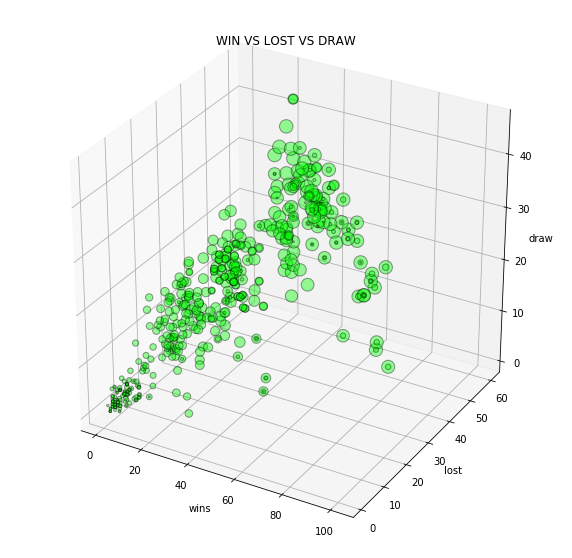

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111,projection ="3d")
ax.scatter(f["win"],f["lost"],f["draw"],s=f["matches"]*3,
           alpha=.4,linewidth =1,edgecolor= "k",c = "lime")
ax.set_xlabel("wins")
ax.set_ylabel("lost")
ax.set_zlabel("draw")
plt.title("WIN VS LOST VS DRAW")
plt.show()

### Performance by top teams

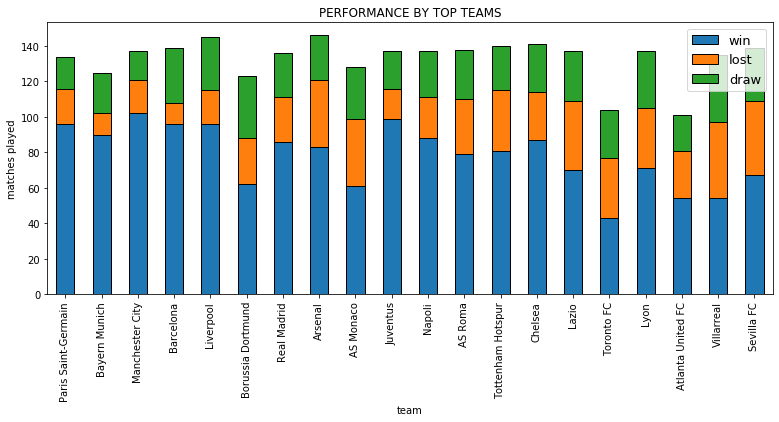

In [32]:
f = f.sort_values(by="goals",ascending=False)
f_new = f.copy()
f_new.index = f_new.team
f_new[["win","lost","draw"]][:20].plot(kind = "bar",figsize=(13,5),
                                   stacked =True,linewidth = 1,
                                   edgecolor = "k"*20
                                  )
plt.legend(loc="best",prop = {"size" : 13})
plt.title("PERFORMANCE BY TOP TEAMS")
plt.ylabel("matches played")
plt.show()

### Top teams by league

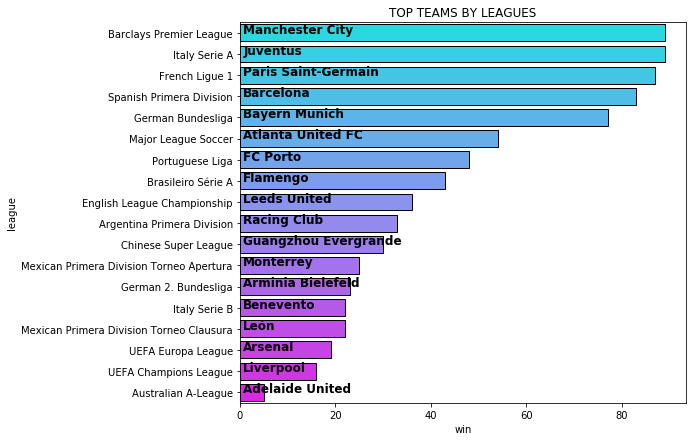

In [33]:
x = pd.DataFrame(data.groupby(["league","win"])["win"].count())
x = x.rename(columns={"win":"team"}).reset_index()
x = x.rename(columns={"win":"team","team":"win"})
x = x.sort_values(by="win",ascending=False)
x = x[x["team"] != "DRAW"]
x = x.drop_duplicates(subset=["league"],keep="first")
plt.figure(figsize=(8,7))
ax =sns.barplot(x["win"],x["league"],palette="cool",
               linewidth = 1 ,edgecolor = "k"*10)
for i,j in enumerate(x["team"]):
    ax.text(.7,i,j,weight = "bold",fontsize = 12)
plt.title("TOP TEAMS BY LEAGUES")
plt.show()

### Matches played in each league vs total goals scored

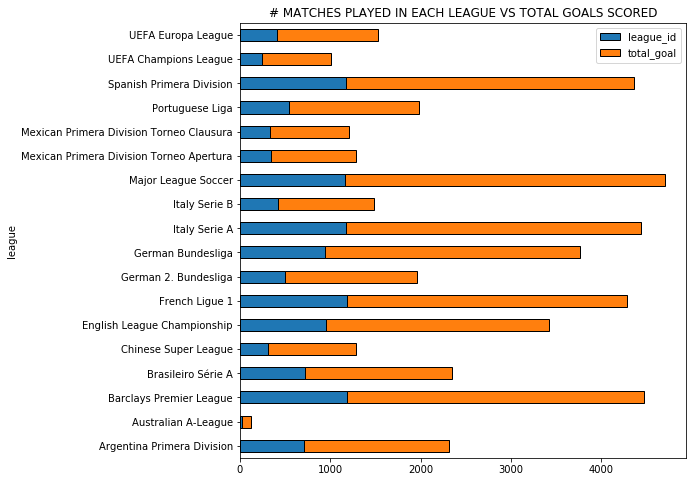

In [34]:
data["total_goal"] = data["score1"]+data["score2"]
data.groupby(["league"]).agg({"league_id":"count","total_goal":"sum"}).plot(kind="barh",
                                                                               stacked =True,
                                                                               figsize=(8,8),
                                                                               linewidth = 1,
                                                                               edgecolor = "k"*data["league"].nunique()
                                                                              )
plt.title("# MATCHES PLAYED IN EACH LEAGUE VS TOTAL GOALS SCORED")
plt.show()

### Proportion of matches played and goals scored in leagues

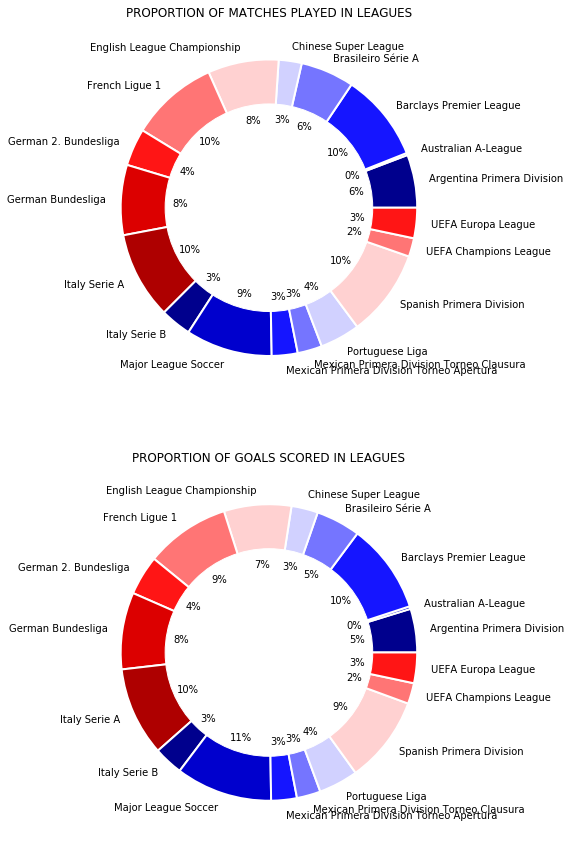

In [35]:
plt.figure(figsize=(7,15))
plt.subplot(211)
agg = data.groupby(["league"]).agg({"league_id":"count","total_goal":"sum"})
agg["league_id"].plot.pie(colors=sns.color_palette("seismic",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF MATCHES PLAYED IN LEAGUES")
plt.subplot(212)
agg["total_goal"].plot.pie(colors=sns.color_palette("seismic",10),
                           autopct="%1.0f%%",
                           wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GOALS SCORED IN LEAGUES")
plt.show()

### Top Teams Wordcloud

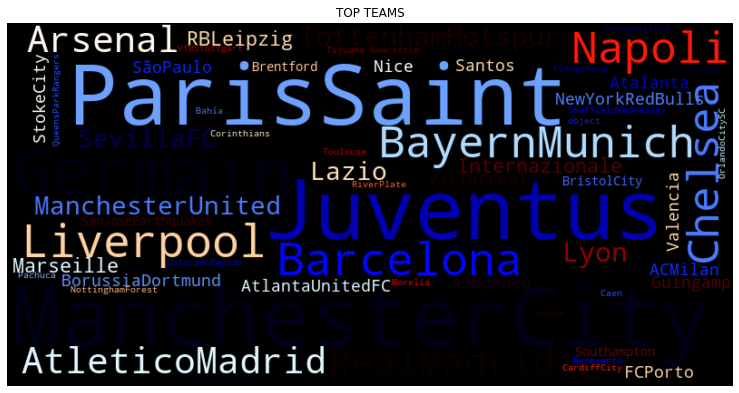

In [36]:
from wordcloud import WordCloud
import nltk
wrd = data[data["win"] != "DRAW"]["win"].to_frame()
wrd = wrd["win"].value_counts()[wrd["win"].value_counts() > 25].keys().str.replace(" ","")
wrd = pd.DataFrame(wrd)
wc = WordCloud(background_color="black",scale =2,colormap="flag").generate(str(wrd[0]))
plt.figure(figsize=(13,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("TOP TEAMS")
plt.show()